# Projections:

In [1]:
import sys
print(sys.executable)

C:\Users\benja\anaconda3\python.exe


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')

In [3]:
df1 = pd.read_csv("Cropscape+Pop.csv")
df2 = pd.read_csv("Income+Household.csv", encoding='latin-1')
df1.head(5)

,FIPS,County,State,Year,Population,Total Accounted,Total Crops,Major Crops,Minor Crops,Pasture,...,Gourds,Cranberries,Cucumbers,Lettuce/Cotton,WW/Cotton,Broccoli,Lettuce,Cantaloupes,Durum/Sorghum,Pasture Grass
0,1001,Autauga County,Alabama,2010,54773,379826.90,14033.10,12540.83,1492.27,53223.45,...,0.0,0.0,0.0,0.0,0.67,0.0,0.0,0.00,0.0,1006.34
1,1003,Baldwin County,Alabama,2010,183112,989959.98,96017.27,35208.16,60809.11,78407.40,...,0.0,0.0,0.0,0.0,141.22,0.0,0.0,0.00,0.0,27424.13
2,1005,Barbour County,Alabama,2010,27327,549551.27,13171.32,6357.15,6814.17,53555.93,...,0.0,0.0,0.0,0.0,9.34,0.0,0.0,0.00,0.0,15182.87
3,1007,Bibb County,Alabama,2010,22870,397570.42,2034.68,1981.53,53.15,32370.41,...,0.0,0.0,0.0,0.0,0.22,0.0,0.0,0.22,0.0,205.94
4,1009,Blount County,Alabama,2010,57376,411992.04,11548.73,11071.69,477.04,121882.19,...,0.0,0.0,0.0,0.0,0.67,0.0,0.0,0.00,0.0,151.45


In [4]:
df2.head(5)

,County,State,Year,Household Count,Median Income
0,Autauga County,Alabama,2010,19718,53255.0
1,Baldwin County,Alabama,2010,69476,50147.0
2,Barbour County,Alabama,2010,9795,33219.0
3,Bibb County,Alabama,2010,7441,41770.0
4,Blount County,Alabama,2010,20605,45549.0


In [5]:
df1.columns, df2.columns

(Index(['FIPS', 'County', 'State', 'Year', 'Population', 'Total Accounted',
        'Total Crops', 'Major Crops', 'Minor Crops', 'Pasture',
        ...
        'Gourds', 'Cranberries', 'Cucumbers', 'Lettuce/Cotton', 'WW/Cotton',
        'Broccoli', 'Lettuce', 'Cantaloupes', 'Durum/Sorghum', 'Pasture Grass'],
       dtype='object', length=134),
 Index(['County', 'State', 'Year', 'Household Count', 'Median Income'], dtype='object'))

In [6]:
columns = ['FIPS', 'County', 'State', 'Year', 'Population', 'Total Accounted', 'Total Crops', 'Pasture', 'Hay', 'Forest', 'Developed Open', 'Developed Non-Open']

df_simp = df1[df1['State'] == 'Tennessee'][columns]
df_simp.head(10)

,FIPS,County,State,Year,Population,Total Accounted,Total Crops,Pasture,Hay,Forest,Developed Open,Developed Non-Open
2316,47001,Anderson County,Tennessee,2010,75098,215077.71,495.05,26013.48,9377.71,148072.70,16079.34,15039.42
2317,47003,Bedford County,Tennessee,2010,45078,302988.94,18950.68,137580.58,22606.85,102145.13,15632.11,6073.59
2318,47005,Benton County,Tennessee,2010,16511,251998.77,11367.70,29279.79,9126.40,191519.92,9010.09,1694.86
2319,47007,Bledsoe County,Tennessee,2010,12884,259119.41,4503.27,48558.95,23718.60,171658.98,8567.08,2112.52
2320,47009,Blount County,Tennessee,2010,123199,356686.75,6246.84,40943.94,43555.52,231575.83,23295.16,11069.47
2321,47011,Bradley County,Tennessee,2010,99083,210067.84,3117.75,47753.21,15026.75,114298.32,16427.39,13444.42
2322,47013,Campbell County,Tennessee,2010,40735,306829.90,568.66,33881.13,8213.03,236538.79,17441.07,10187.23
2323,47015,Cannon County,Tennessee,2010,13797,169768.85,14898.88,32586.80,13042.99,101590.92,6494.14,1155.12
2324,47017,Carroll County,Tennessee,2010,28454,382014.82,78546.18,60873.38,4250.85,219154.21,17072.56,2117.64
2325,47019,Carter County,Tennessee,2010,57342,218274.42,650.73,17257.15,10781.46,171330.72,13146.63,5107.74


In [7]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

In [8]:
import pandas as pd
import statsmodels.api as sm

# Add a constant to the DataFrame
df_simp = sm.add_constant(df_simp)

# Specify your dependent variables
dependent_vars = ['Total Crops', 'Pasture', 'Hay', 'Forest', 'Developed Open', 'Developed Non-Open']

# Loop through your dependent variables and run regression for each
for var in dependent_vars:
    y = df_simp[var]

    # Assuming 'FIPS', 'County', 'Year' are your independent variables
    X = df_simp[['const', 'FIPS']]
    
    model = sm.OLS(y, X)
    res = model.fit()

    # Output the results
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Crops   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.367
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.242
Time:                        12:35:48   Log-Likelihood:                -15121.
No. Observations:                1235   AIC:                         3.025e+04
Df Residuals:                    1233   BIC:                         3.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.467e+06   1.23e+06      1.194      0.2

In [9]:
df_simp['Total_Ag_Rate'] = (df_simp['Total Crops'] + df_simp['Pasture'] + df_simp['Hay'] + df_simp['Forest'])/df_simp['Total Accounted']

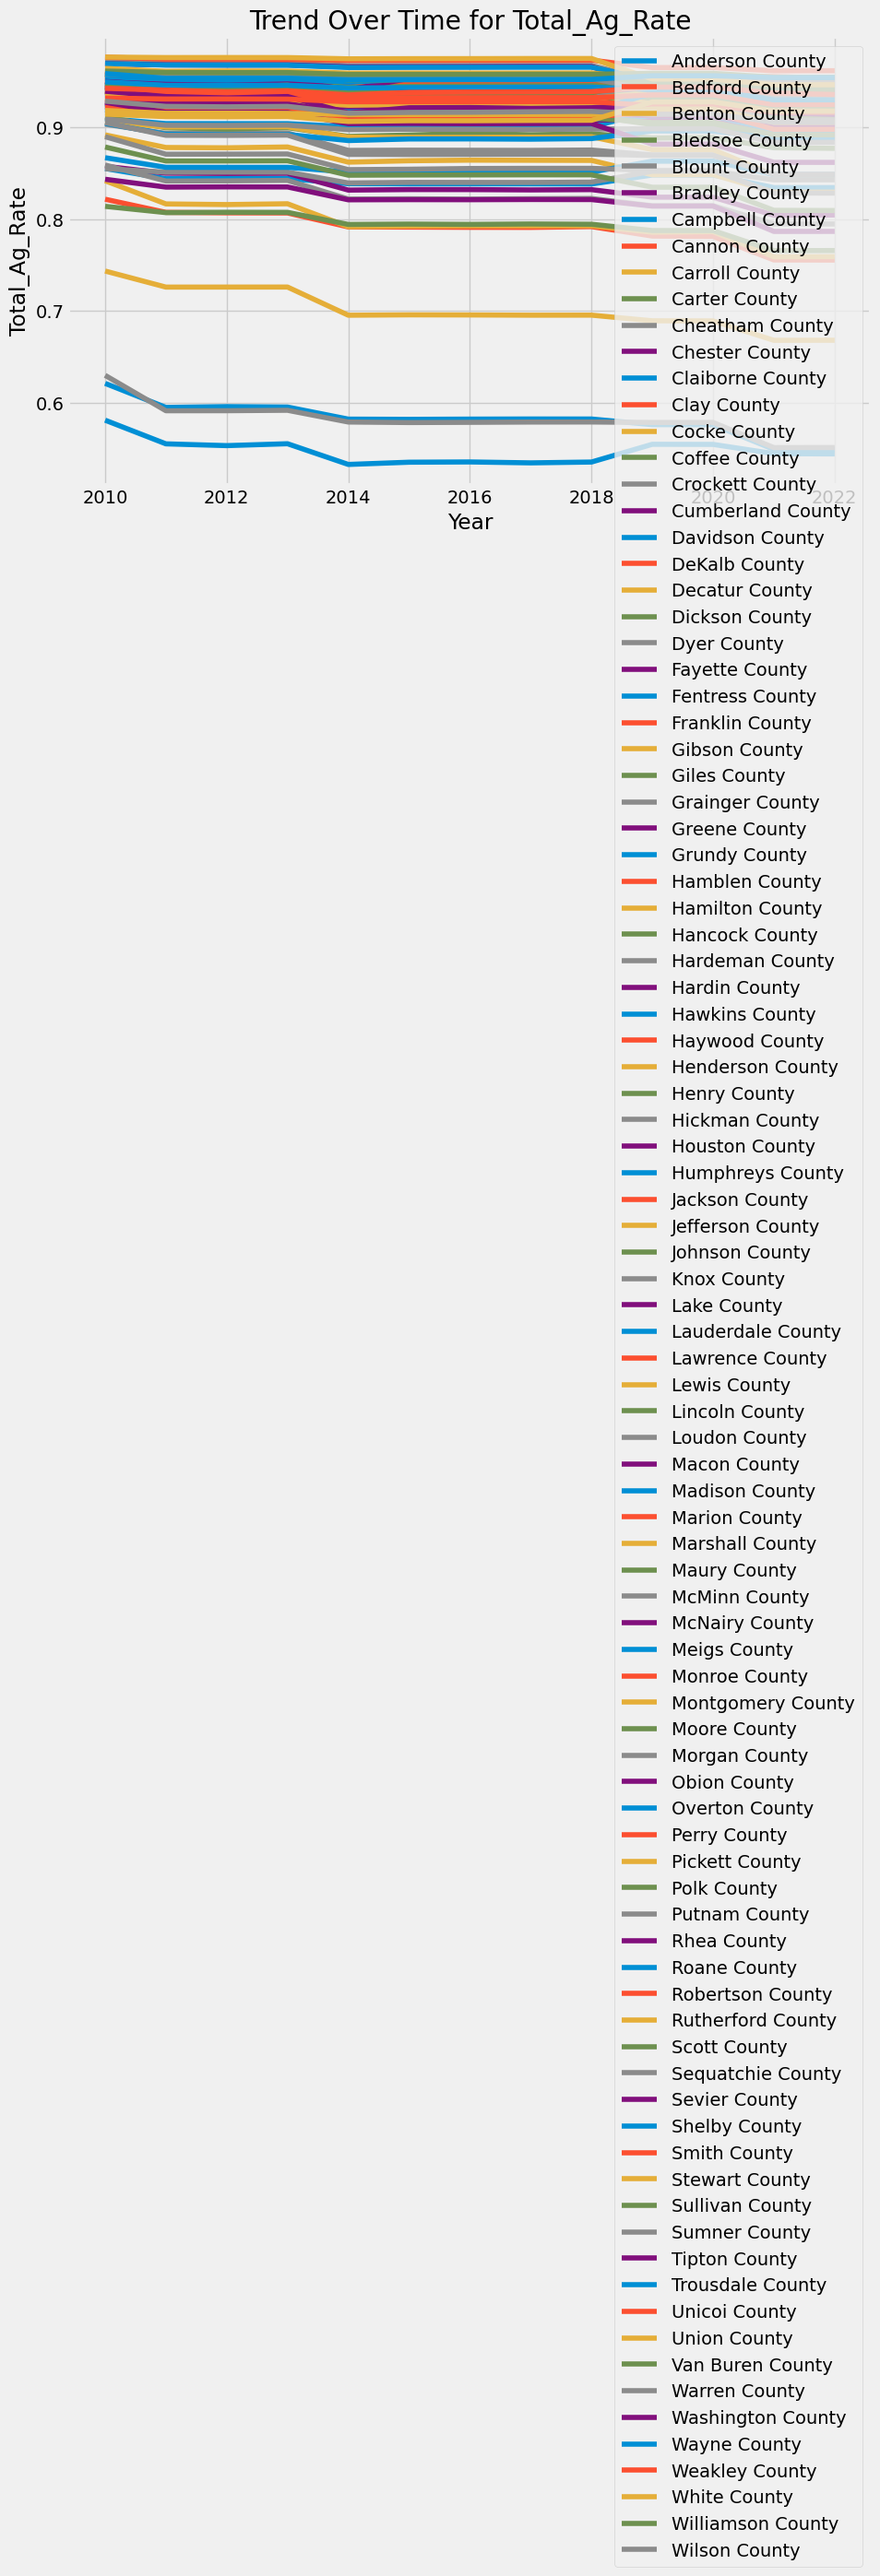

In [10]:
# list of columns to plot
cols_to_plot = ['Total_Ag_Rate']

# iterate over the list and create a line plot for each column
for col in cols_to_plot:
    plt.figure(figsize=(10,6))  # setting the figure size
    for label, group_data in df_simp.groupby('County'):
        plt.plot(group_data['Year'], group_data[col], label=label)
    plt.title(f'Trend Over Time for {col}')  # setting the title of the plot
    plt.xlabel('Year')  # setting the x-label of the plot
    plt.ylabel(col)  # setting the y-label of the plot
    plt.legend()  # displaying the legend
    plt.show()  # displaying the plot

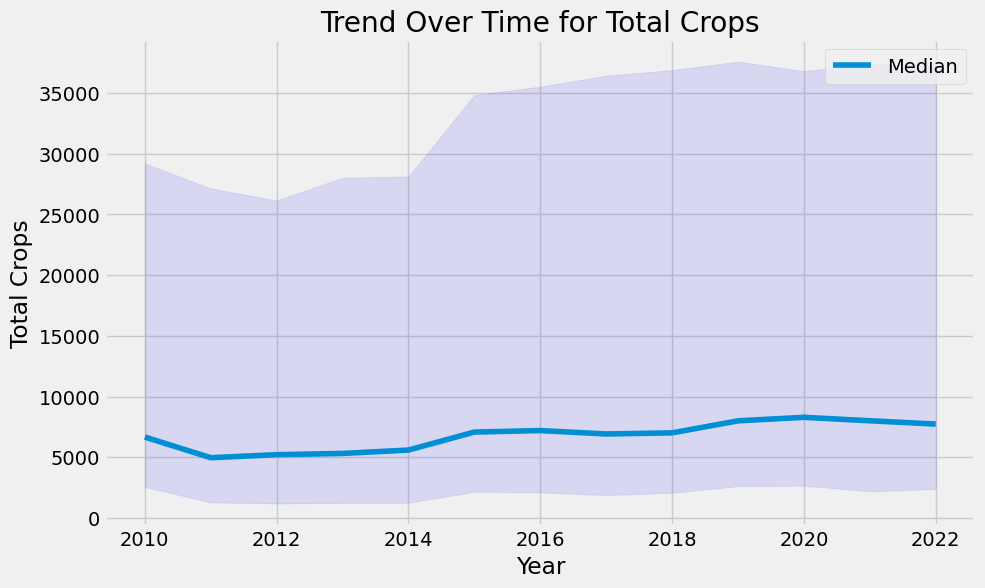

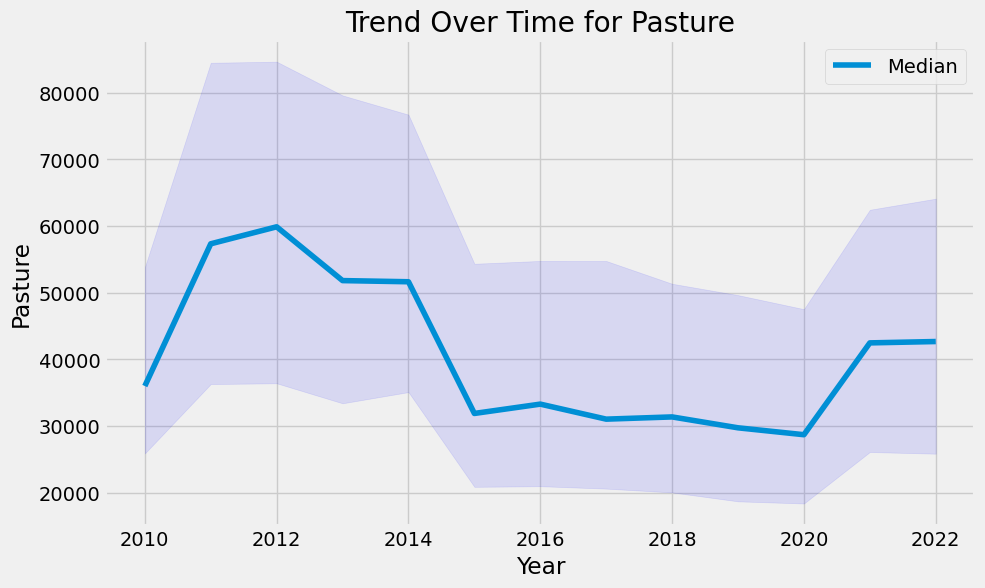

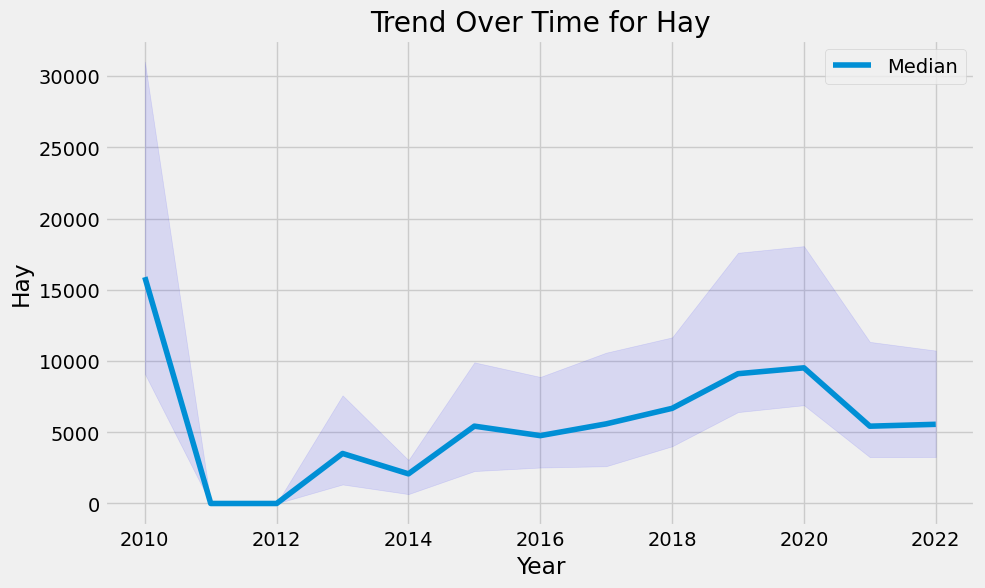

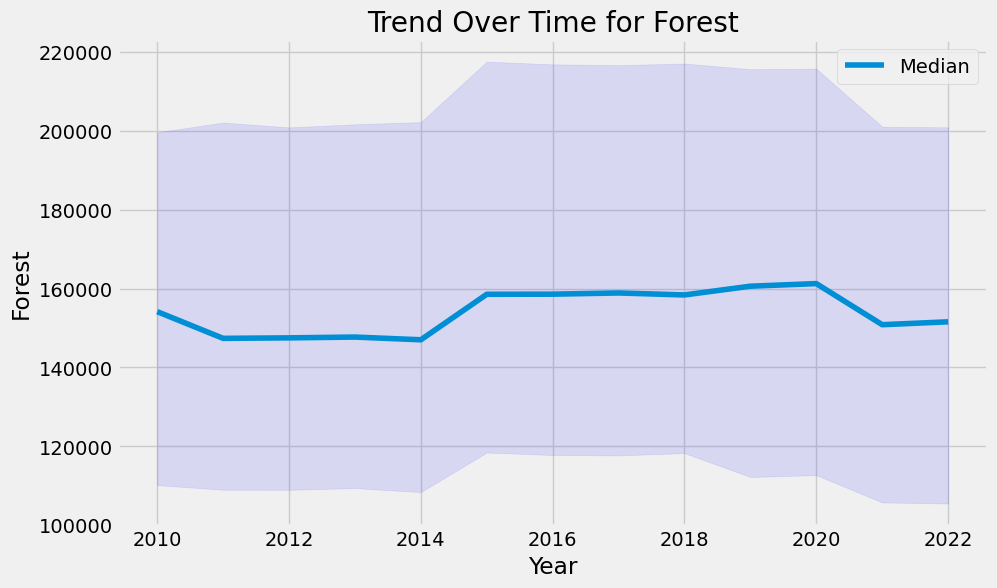

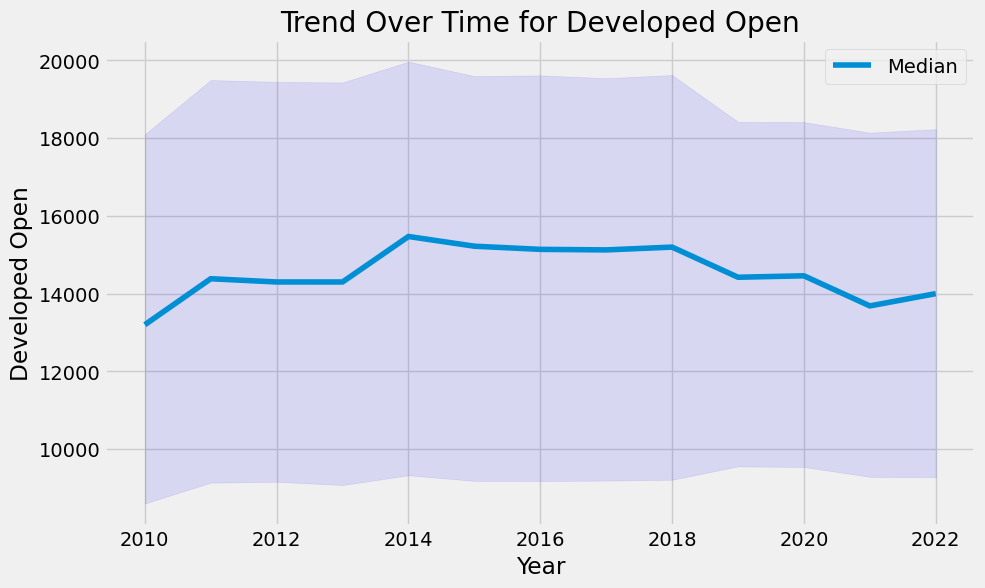

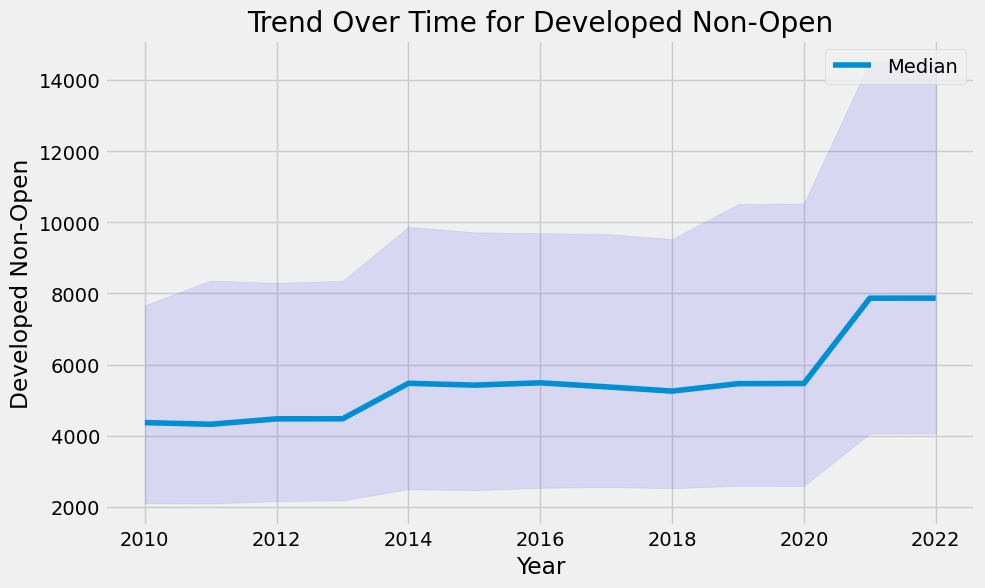

In [11]:
cols_to_plot2 = ['Total Crops', 'Pasture', 'Hay', 'Forest', 'Developed Open', 'Developed Non-Open']
for col in cols_to_plot2:
    plt.figure(figsize=(10,6))  
    median = df_simp.groupby('Year')[col].median()  # Change to .mean() if you prefer mean over median
    lower = df_simp.groupby('Year')[col].quantile(0.25)  # 1st quartile
    upper = df_simp.groupby('Year')[col].quantile(0.75)  # 3rd quartile
    
    plt.plot(median.index, median, label='Median')  
    plt.fill_between(lower.index, lower, upper, color='b', alpha=.1)  # Fill the IQR
    plt.title(f'Trend Over Time for {col}')  
    plt.xlabel('Year')  
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
series = df_simp[df_simp['County']=='Knox County']['Total_Ag_Rate']

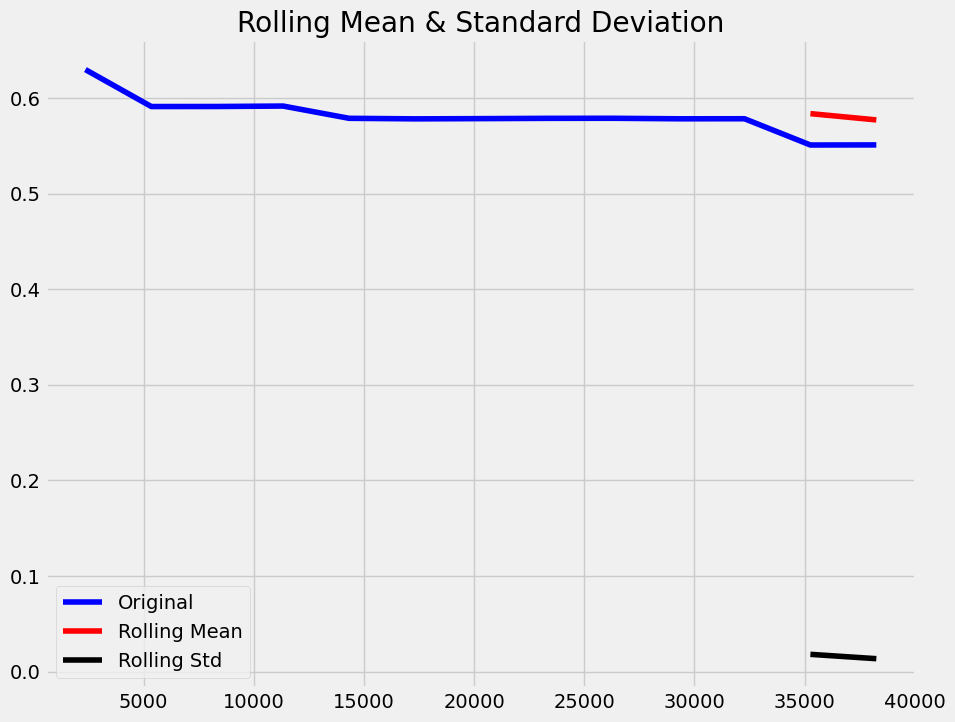

Results of Dickey-Fuller Test:
Test Statistic                 -2.830847
p-value                         0.054001
#Lags Used                      0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [14]:
def check_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

check_stationarity(series)

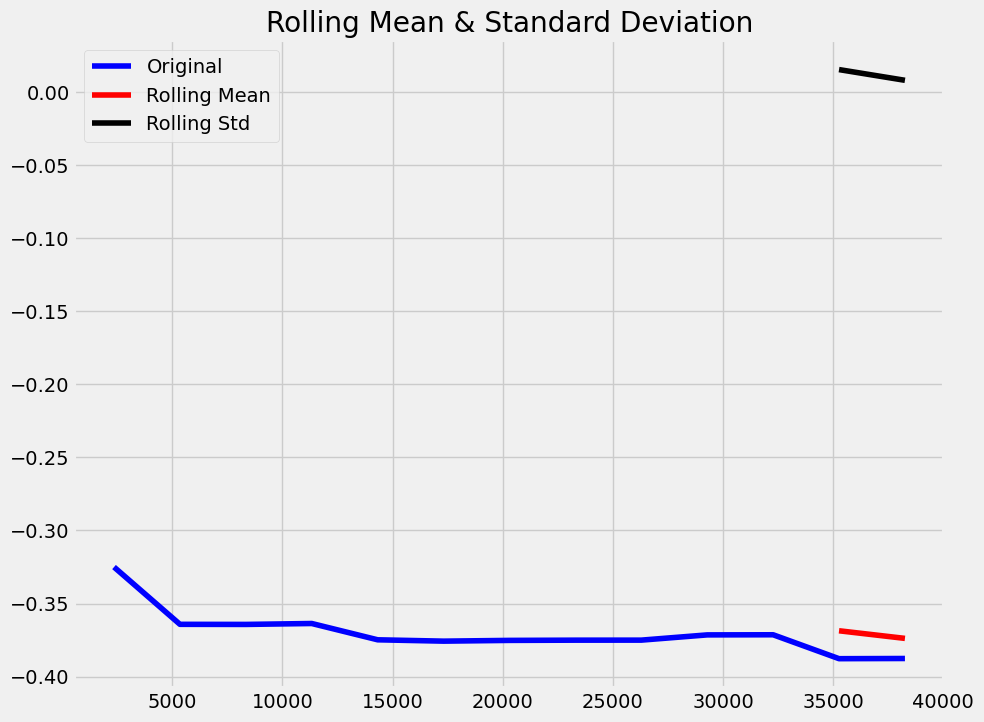

Results of Dickey-Fuller Test:
Test Statistic                -1.680299
p-value                        0.441290
#Lags Used                     4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [15]:
# Take the first order difference to remove any potential trend in the data
df_simp['Total_Ag_Rate_diff'] = df_simp['Total_Ag_Rate'].diff()

# Drop the missing values that were created by differencing
df_simp = df_simp.dropna()

# Run the Dickey-Fuller test on the differenced series
series_diff = df_simp[df_simp['County']=='Knox County']['Total_Ag_Rate_diff']
check_stationarity(series_diff)

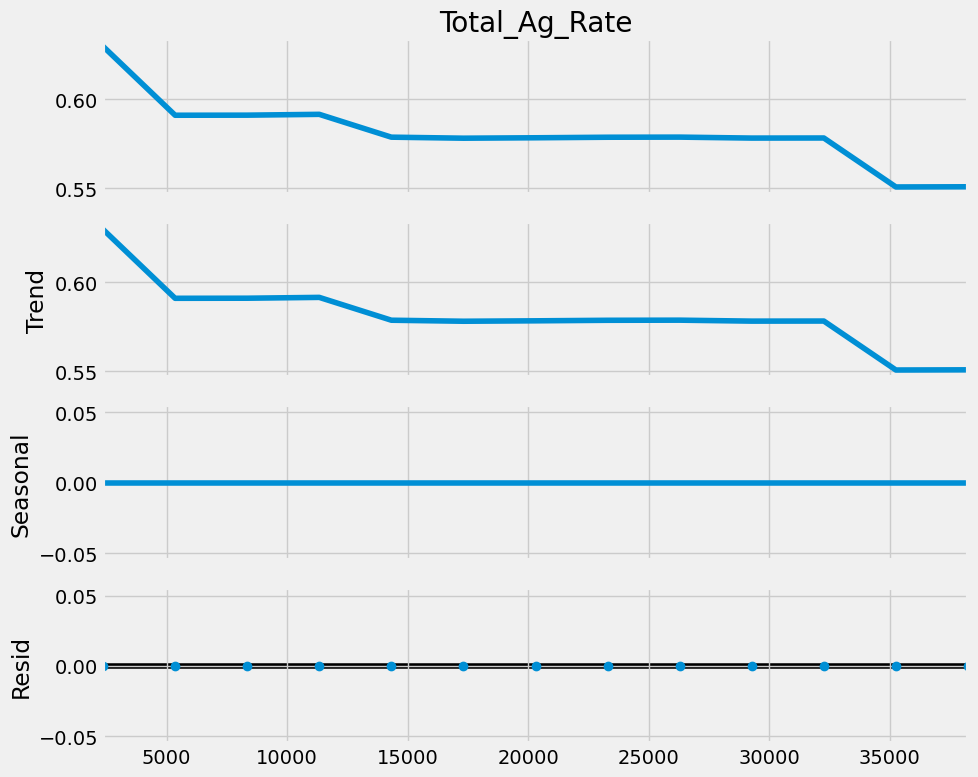

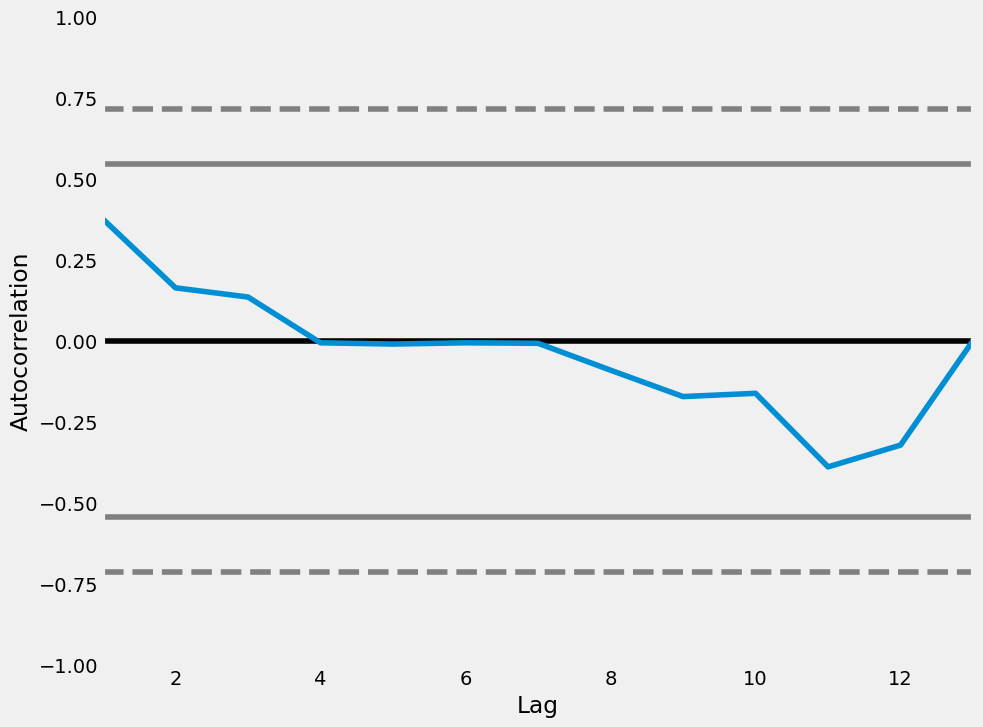

In [16]:
#check for seasonality before sceond-order differencing
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Decompose the time series
result = seasonal_decompose(df_simp[df_simp['County']=='Knox County']['Total_Ag_Rate'], model='additive', period=1)

# Plot the original series, the trend, the seasonality, and the residuals 
result.plot()
plt.show()

# Plot the autocorrelation plot
autocorrelation_plot(df_simp[df_simp['County']=='Knox County']['Total_Ag_Rate'])
plt.show()

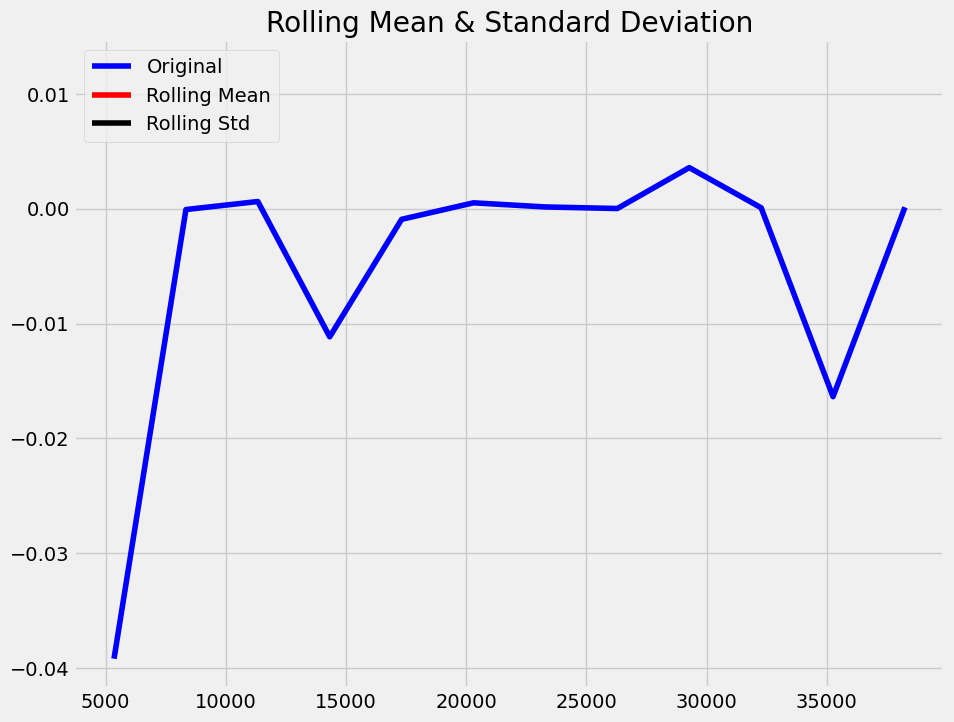

Results of Dickey-Fuller Test:
Test Statistic                -6.949861e+00
p-value                        9.755605e-10
#Lags Used                     0.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


In [17]:
# Take the second order difference
df_simp.loc[df_simp['County']=='Knox County', 'Total_Ag_Rate_diff_2'] = df_simp.loc[df_simp['County']=='Knox County', 'Total_Ag_Rate_diff'].diff()

# Drop the missing values that were created by differencing
df_simp = df_simp.dropna()

# Run the Dickey-Fuller test on the differenced series
series_diff_2 = df_simp[df_simp['County']=='Knox County']['Total_Ag_Rate_diff_2']
check_stationarity(series_diff_2)

In [18]:
from pmdarima import auto_arima

# Fit auto_arima function to dataset
model = auto_arima(df_simp[df_simp['County']=='Knox County']['Total_Ag_Rate_diff_2'].dropna(), start_p = 1, start_q = 1, 
                   max_p = 3, max_q = 3, 
                   d = 0, trace = True, error_action ='ignore', suppress_warnings = True, 
                   stepwise = True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-65.352, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-68.906, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-67.234, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-67.386, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-68.699, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.538 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                        SARIMAX   Log Likelihood                  36.453
Date:                Fri, 05 Jan 2024   AIC                            -68.906
Time:                        12:36:01   BIC                            -67.936
Sample:                             0   HQIC                           -69.265
                                 - 12                                         
Co

In [19]:
#Isolate first:
df_knox = df_simp.loc[df_simp['County']=='Knox County']
model = auto_arima(df_knox['Total_Ag_Rate_diff_2'].dropna(), start_p = 1, start_q = 1, 
                   max_p = 3, max_q = 3, start_P = 0, seasonal = False, 
                   d = None, D = 1, trace = True, error_action ='ignore', 
                   suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-64.699, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-68.699, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-66.699, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-66.694, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-68.906, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-67.234, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-67.386, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-65.352, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.730 seconds


In [20]:
# Forecast
n_periods = 3
forecast, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a pandas series with the forecast and the confidence intervals
forecast_series = pd.Series(forecast, index=np.arange(df_knox.index[-1] + 1, df_knox.index[-1] + 1 + n_periods))
lower_series = pd.Series(confint[:, 0], index=np.arange(df_knox.index[-1] + 1, df_knox.index[-1] + 1 + n_periods))
upper_series = pd.Series(confint[:, 1], index=np.arange(df_knox.index[-1] + 1, df_knox.index[-1] + 1 + n_periods))

# Reverse the second order differencing
forecast_series_cumsum = forecast_series.cumsum()
forecast_series_cumsum += df_knox['Total_Ag_Rate_diff'].iat[-1]

forecast_series_cumsum2 = forecast_series_cumsum.cumsum()
forecast_series_cumsum2 += df_knox['Total_Ag_Rate'].iat[-1]

print(forecast_series_cumsum2)

38255   NaN
38256   NaN
38257   NaN
dtype: float64


C:\Users\benja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\benja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


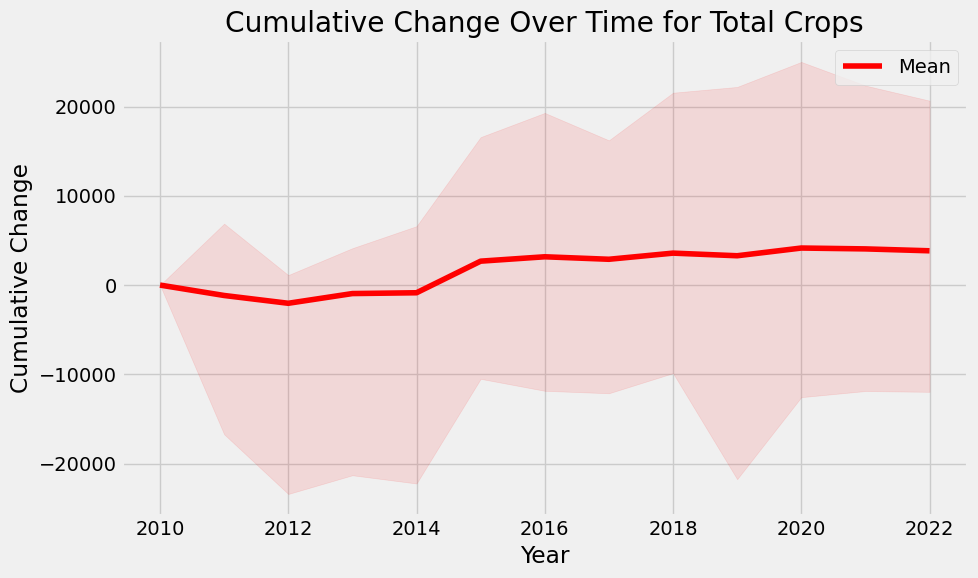

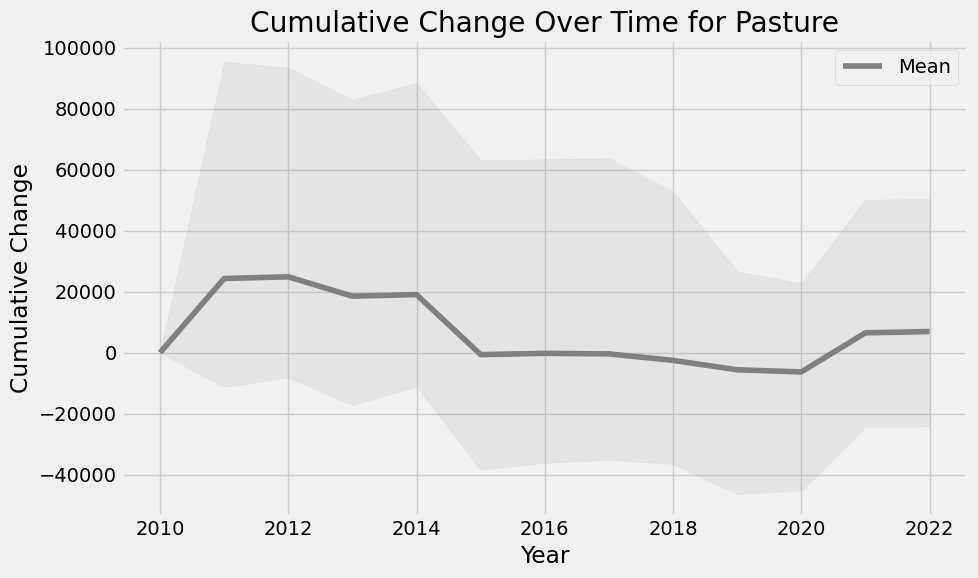

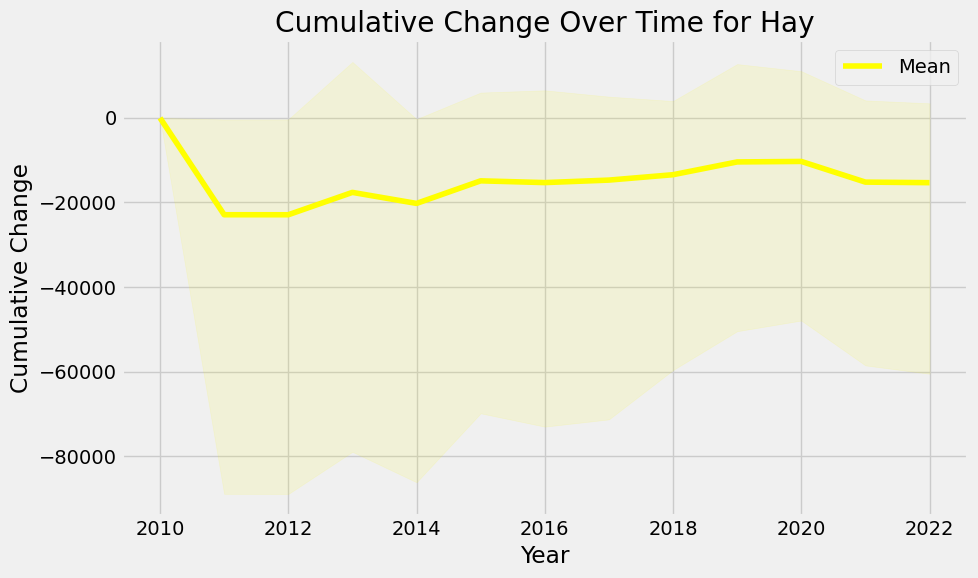

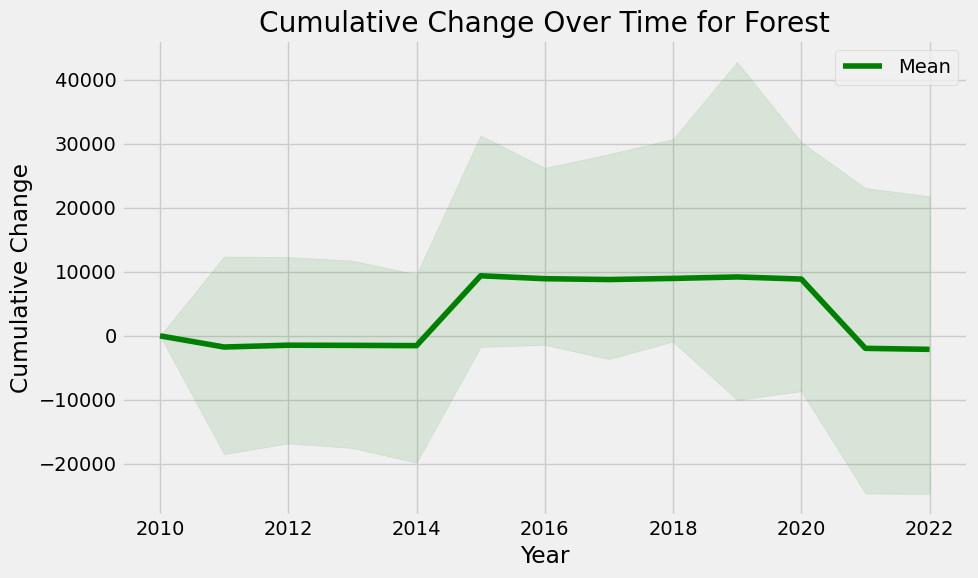

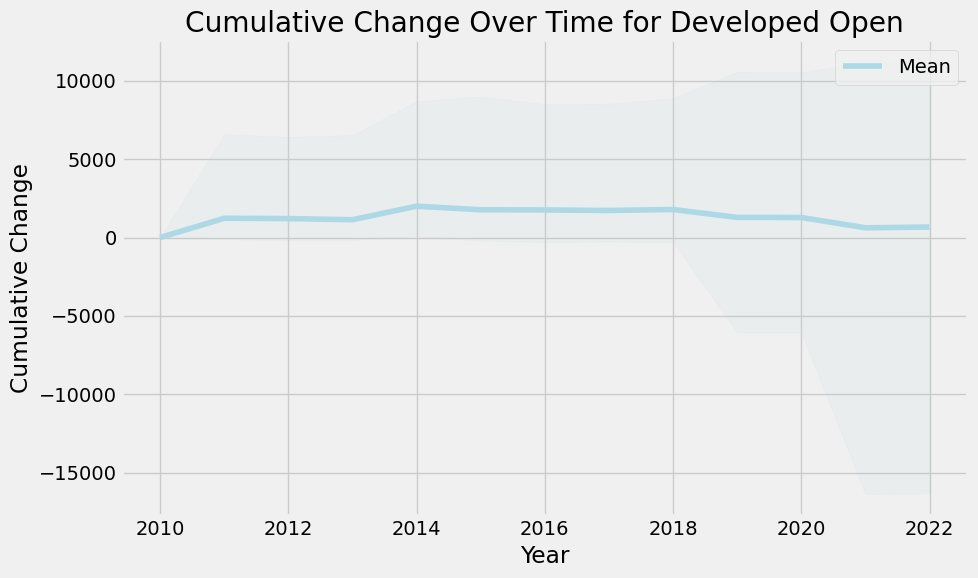

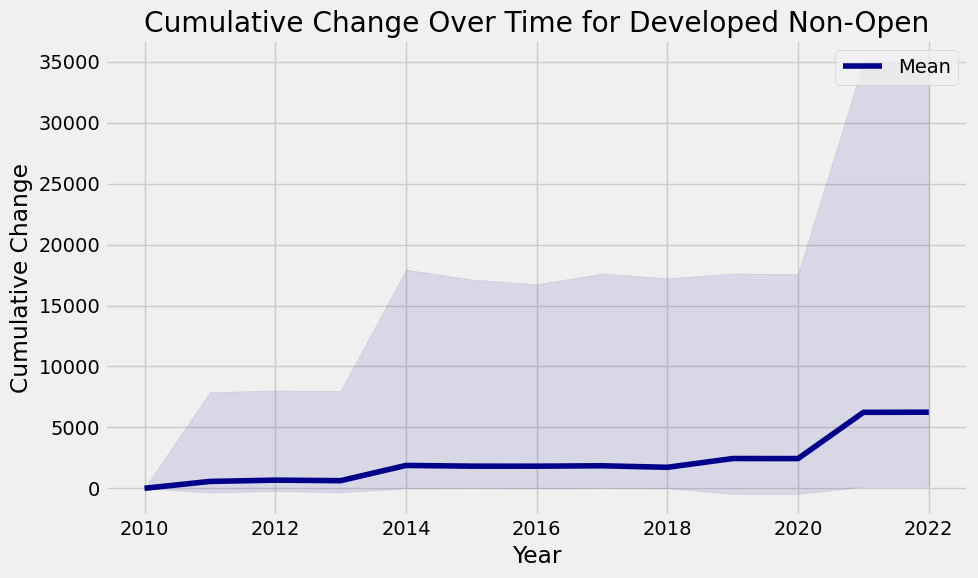

In [21]:
colors = {"Total Crops": "red", "Pasture": "grey", "Hay": "yellow", "Forest": "green", "Developed Open": "lightblue", "Developed Non-Open": "darkblue"}

# Filter the data for Tennessee
df_temp = df1[df1['State'] == 'Tennessee'].copy()  # Use .copy() here

for col in cols_to_plot2:
    plt.figure(figsize=(10,6))

    # Compute the rolling change for each county and each year
    rolling_changes = df_temp.groupby('County')[col].transform(lambda x: x.diff().cumsum().fillna(0))
    
    # Add these rolling changes to the DataFrame under a new column
    df_temp['Rolling Change'] = rolling_changes

    # Compute the mean, min, and max of these rolling changes per year
    mean_rolling_change = df_temp.groupby('Year')['Rolling Change'].mean()
    min_rolling_change = df_temp.groupby('Year')['Rolling Change'].min()
    max_rolling_change = df_temp.groupby('Year')['Rolling Change'].max()

    plt.plot(mean_rolling_change.index, mean_rolling_change, label='Mean', color=colors[col])
    plt.fill_between(min_rolling_change.index, min_rolling_change, max_rolling_change, color=colors[col], alpha=.1)
    
    plt.title(f'Cumulative Change Over Time for {col}')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Change')
    plt.legend()

    # Adjust the layout to account for labels on the edge of the plot
    plt.tight_layout()

    # Save the figure in the specified directory
#     plt.savefig(f"C:/Users/benja/Documents/Trend Graphs/{col}_cumulative_change.png", format='png')

    plt.show()

    # Drop the added column before the next iteration
    df_temp = df_temp.drop(columns='Rolling Change')

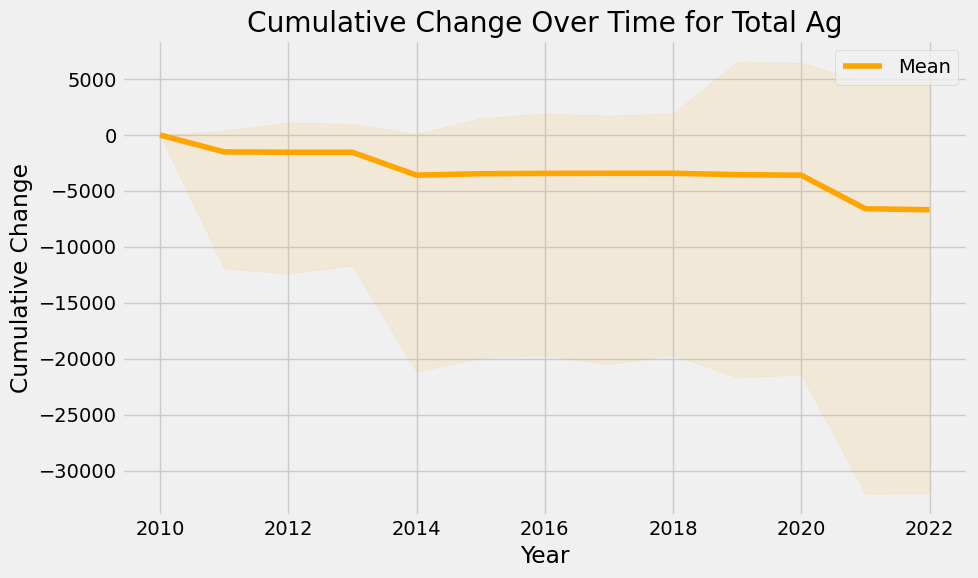

In [22]:
df1['Total Ag'] = df1['Total Crops'] + df1['Pasture'] + df1['Hay'] + df1['Forest']
colors2 = {"Total Ag": "orange"}
cols_to_plot3 = ['Total Ag']
    
# Filter the data for Tennessee
df_temp = df1[df1['State'] == 'Tennessee'].copy()  # Use .copy() here

for col in cols_to_plot3:
    plt.figure(figsize=(10,6))

    # Compute the rolling change for each county and each year
    rolling_changes = df_temp.groupby('County')[col].transform(lambda x: x.diff().cumsum().fillna(0))
    
    # Add these rolling changes to the DataFrame under a new column
    df_temp['Rolling Change'] = rolling_changes

    # Compute the mean, min, and max of these rolling changes per year
    mean_rolling_change = df_temp.groupby('Year')['Rolling Change'].mean()
    min_rolling_change = df_temp.groupby('Year')['Rolling Change'].min()
    max_rolling_change = df_temp.groupby('Year')['Rolling Change'].max()

    plt.plot(mean_rolling_change.index, mean_rolling_change, label='Mean', color=colors2[col])
    plt.fill_between(min_rolling_change.index, min_rolling_change, max_rolling_change, color=colors2[col], alpha=.1)
    
    plt.title(f'Cumulative Change Over Time for {col}')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Change')
    plt.legend()

    # Adjust the layout to account for labels on the edge of the plot
    plt.tight_layout()

    # Save the figure in the specified directory
#     plt.savefig(f"C:/Users/benja/Documents/Trend Graphs/{col}_cumulative_change.png", format='png')

    plt.show()

    # Drop the added column before the next iteration
    df_temp = df_temp.drop(columns='Rolling Change')

## We have determined ARIMA is not the correct model for this problem. ELM should be attempted last. Next is SEM:

In [23]:
#Endogenous Variables:
    #Pasture
    #Total Crops
    #Hay
    #Forest
    #Developed Open
    #Developed Non-Open
    
#Exogenous Variables:
    #Median Income
    #Household Count

In [24]:
# A 2SLS method should be used to avoid bias:
#   First stage: Regress each endogenous variable on all of the exogenous variables.
#   Second stage: Use the predicted values from the first stage to estimate the parameters in the system of equations.

In [25]:
# List of columns for this regression type
cols_df1 = ['County', 'State', 'Year', 'Total Crops', 'Pasture', 'Hay', 'Forest', 'Developed Open', 'Developed Non-Open']
cols_df2 = ['County', 'State', 'Year', 'Household Count', 'Median Income']

# Merge based on 'County', 'State', and 'Year'
df3 = pd.merge(df1[cols_df1], df2[cols_df2], on=['County', 'State', 'Year'], how='left')
df3.head(5)

,County,State,Year,Total Crops,Pasture,Hay,Forest,Developed Open,Developed Non-Open,Household Count,Median Income
0,Autauga County,Alabama,2010,14033.10,53223.45,21882.95,271317.95,13842.28,5527.18,19718.0,53255.0
1,Baldwin County,Alabama,2010,96017.27,78407.40,18267.93,729573.61,46390.16,21303.62,69476.0,50147.0
2,Barbour County,Alabama,2010,13171.32,53555.93,21200.42,437668.15,18758.75,5196.69,9795.0,33219.0
3,Bibb County,Alabama,2010,2034.68,32370.41,5317.90,342314.95,13791.57,1740.90,7441.0,41770.0
4,Blount County,Alabama,2010,11548.73,121882.19,21875.17,233306.51,17834.26,5545.19,20605.0,45549.0


In [26]:
# due to exog vars
df3 = df3[df3['Year'] != 2022]

In [27]:
na_counts = df3[df3.isnull().any(axis=1)].groupby('State').size()
na_counts

State
New Mexico      1
South Dakota    5
Texas           3
dtype: int64

In [28]:
# Find counties with missing rows
counties_with_missing_data = df3[df3.isnull().any(axis=1)][['County', 'State']].drop_duplicates()

counties_with_missing_data

,County,State
2300,Oglala Lakota County,South Dakota
17516,Loving County,Texas
25633,Rio Arriba County,New Mexico
32442,Jeff Davis County,Texas


In [29]:
for index, row in counties_with_missing_data.iterrows():
    county, state = row['County'], row['State']
    df3 = df3[~((df3['County'] == county) & (df3['State'] == state))]

df3.head(5)

,County,State,Year,Total Crops,Pasture,Hay,Forest,Developed Open,Developed Non-Open,Household Count,Median Income
0,Autauga County,Alabama,2010,14033.10,53223.45,21882.95,271317.95,13842.28,5527.18,19718.0,53255.0
1,Baldwin County,Alabama,2010,96017.27,78407.40,18267.93,729573.61,46390.16,21303.62,69476.0,50147.0
2,Barbour County,Alabama,2010,13171.32,53555.93,21200.42,437668.15,18758.75,5196.69,9795.0,33219.0
3,Bibb County,Alabama,2010,2034.68,32370.41,5317.90,342314.95,13791.57,1740.90,7441.0,41770.0
4,Blount County,Alabama,2010,11548.73,121882.19,21875.17,233306.51,17834.26,5545.19,20605.0,45549.0


In [30]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.sandbox.sysreg import SUR

In [31]:
# Rename columns to remove spaces
df3 = df3.rename(columns={
    'Total Crops': 'Total_Crops',
    'Developed Open': 'Developed_Open',
    'Developed Non-Open': 'Developed_Non_Open',
    'Median Income': 'Median_Income',
    'Household Count': 'Household_Count'
})

# equations = {
#     'Total_Crops': 'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Pasture': 'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Hay': 'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Forest': 'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Developed_Open': 'Developed_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Developed_Non_Open + Median_Income + Household_Count',
#     'Developed_Non_Open': 'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops + Median_Income + Household_Count',
# }

# mod = SUR.from_formula(equations, data=df3)
# res = mod.fit(cov_type='unadjusted')
# print(res)

In [32]:
# for eq_name, eq_res in res.equations.items():
#     coeffs = eq_res.params
#     equation_str = f"{eq_name} = {coeffs[0]:.4f}"
#     for var_name, coeff in coeffs[1:].iteritems():
#         equation_str += f" + {coeff:.4f}*{var_name}"
#     print(equation_str)

In [33]:
# Considering all this, Hay may be insignificant. Let's remodel without Hay.

In [34]:
# equations = {
#     'Total_Crops': 'Total_Crops ~ 1 + Pasture + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Pasture': 'Pasture ~ 1 + Total_Crops + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Forest': 'Forest ~ 1 + Pasture + Total_Crops + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Developed_Open': 'Developed_Open ~ 1 + Pasture + Forest + Total_Crops + Developed_Non_Open + Median_Income + Household_Count',
#     'Developed_Non_Open': 'Developed_Non_Open ~ 1 + Pasture + Forest + Developed_Open + Total_Crops + Median_Income + Household_Count',
# }

# mod = SUR.from_formula(equations, data=df3)
# res = mod.fit(cov_type='unadjusted')
# print(res)

In [35]:
# Before getting to deep with income/household count, let's try modeling without them

In [36]:
# equations = {
#     'Total_Crops': 'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open',
#     'Pasture': 'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open',
#     'Hay': 'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Open + Developed_Non_Open',
#     'Forest': 'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open',
#     'Developed_Open': 'Developed_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Developed_Non_Open',
#     'Developed_Non_Open': 'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops',
# }

# mod = SUR.from_formula(equations, data=df3)
# res = mod.fit(cov_type='unadjusted')
# print(res)

In [37]:
# This indicates land variables alone are poorly suited at predicting each other, despite high significance

In [38]:
# Let's try the initial approach but just remove insignificant variables:
# remove dev open from hay & hay from dev open

In [39]:
# equations = {
#     'Total_Crops': 'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Pasture': 'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Hay': 'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Non_Open + Median_Income + Household_Count',
#     'Forest': 'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open + Median_Income + Household_Count',
#     'Developed_Open': 'Developed_Open ~ 1 + Pasture + Forest + Total_Crops + Developed_Non_Open + Median_Income + Household_Count',
#     'Developed_Non_Open': 'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops + Median_Income + Household_Count',
# }

# mod = SUR.from_formula(equations, data=df3)
# res = mod.fit(cov_type='unadjusted')
# print(res)

In [40]:
# Still only a 7.48% overall R^2
# However, McElroy's and Berndt's indicate this is much better than other linear models?

In [41]:
# Create dummy var for year
# Run the model for Tennessee only (State==Tennessee)
# Consider county fixed effects
# Consider dummy for zoning laws or lot minimums per county (may be absorbed in county fixed effects?)

In [42]:
from linearmodels.system import SUR

In [43]:
# Creating a dataframe for Tennessee
df4 = df3.loc[df3['State'] == 'Tennessee'].copy()

# Add Year Fixed Effects:
if 'Year' in df4.columns:
    year_dummies = pd.get_dummies(df4['Year'], prefix='Year', drop_first=True)
    df4 = pd.concat([df4, year_dummies], axis=1)
    year_cols = ' + '.join(year_dummies.columns)

    equations = {
        'Total_Crops': f'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count + {year_cols}',
        'Pasture': f'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count + {year_cols}',
        'Hay': f'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Open + Developed_Non_Open + Median_Income + Household_Count + {year_cols}',
        'Forest': f'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open + Median_Income + Household_Count + {year_cols}',
        'Developed_Open': f'Developed_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Developed_Non_Open + Median_Income + Household_Count + {year_cols}',
        'Developed_Non_Open': f'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops + Median_Income + Household_Count + {year_cols}',
    }

#     # Run the regression
#     mod = SUR.from_formula(equations, data=df4)
#     res = mod.fit(cov_type='unadjusted')
#     print(res)
# else:
#     print("Year column not found in df4.")

In [44]:
# Transform income to log(income)
df4['Log_Median_Income'] = df4['Median_Income'].apply(lambda x: np.log(x))

In [45]:
# Transform household count to 1000s of households
df4['Household_Count_1000s'] = df4['Household_Count'] / 1000

In [46]:
df4 = df4.drop(columns={'Median_Income', 'Household_Count'})

In [47]:
# Updated method:
equations = {
    'Total_Crops': f'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + {year_cols}',
    'Pasture': f'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + {year_cols}',
    'Hay': f'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + {year_cols}',
    'Forest': f'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + {year_cols}',
    'Developed_Open': f'Developed_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + {year_cols}',
    'Developed_Non_Open': f'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops + Log_Median_Income + Household_Count_1000s + {year_cols}',
}

# Run the regression
mod = SUR.from_formula(equations, data=df4)
res = mod.fit(cov_type='unadjusted')
print(res)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.2124
No. Equations.:                     6   McElroy's R-squared:                 0.9337
No. Observations:                1140   Judge's (OLS) R-squared:             0.2124
Date:                Fri, Jan 05 2024   Berndt's R-squared:                  0.9981
Time:                        12:36:09   Dhrymes's R-squared:                 0.2124
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                  Equation: Total_Crops, Dependent Variable: Total_Crops                 
                       Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------
Intercept              3.064e+05  8.499e+04     3.6056    

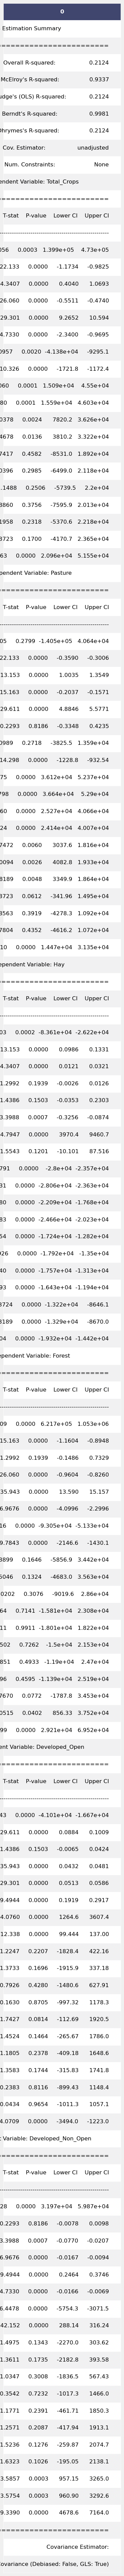

In [48]:
import io

result_str = str(res)
data = io.StringIO(result_str)
df_result = pd.read_csv(data, sep="\t", header=None)

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
    plt.show()

render_mpl_table(df_result, header_columns=0, col_width=4.0)
# plt.savefig('regression_result.png', dpi=300, bbox_inches='tight')

In [49]:
# Regional specification:
# [Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, Oklahoma, South Carolina,
# Tennessee, Texas, Virginia]

In [50]:
# incorporating TAEP data with TN only, 2010-2021

In [51]:
df4.head()

,County,State,Year,Total_Crops,Pasture,Hay,Forest,Developed_Open,Developed_Non_Open,Year_2011,...,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Log_Median_Income,Household_Count_1000s
2316,Anderson County,Tennessee,2010,495.05,26013.48,9377.71,148072.70,16079.34,15039.42,False,...,False,False,False,False,False,False,False,False,10.706610,30.939
2317,Bedford County,Tennessee,2010,18950.68,137580.58,22606.85,102145.13,15632.11,6073.59,False,...,False,False,False,False,False,False,False,False,10.559711,16.005
2318,Benton County,Tennessee,2010,11367.70,29279.79,9126.40,191519.92,9010.09,1694.86,False,...,False,False,False,False,False,False,False,False,10.432732,6.980
2319,Bledsoe County,Tennessee,2010,4503.27,48558.95,23718.60,171658.98,8567.08,2112.52,False,...,False,False,False,False,False,False,False,False,10.299878,4.430
2320,Blount County,Tennessee,2010,6246.84,40943.94,43555.52,231575.83,23295.16,11069.47,False,...,False,False,False,False,False,False,False,False,10.764731,48.151


In [52]:
file_path = "C:/Users/benja/OneDrive/UTIA_Research_Land_Cover/Projections/TAEPCountyReport_Master_Boyer_102423.xlsx"

In [53]:
# Extract TAEP
def extract_data_final(sheet_name, file_path):
    # Read the Excel sheet without setting any header, then manually set the header
    df_TAEP = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    
    # Drop unnecessary rows and reset the index
    df_TAEP = df_TAEP.drop([0, 1, 2]).reset_index(drop=True)
    
    # Extract relevant data and format
    df_extracted = df_TAEP.iloc[:, [0, 4]].copy()
    df_extracted.columns = ['County', 'Variable']
    df_extracted['County'] = df_extracted['County'].str.title() + " County"
    df_extracted['Year'] = int(sheet_name.split('-')[1]) + 2000  # Extract year from sheet name
    
    return df_extracted

# Extract data again for each year from 2010 to 2021
df_TAEP_list = [extract_data_final(f"TAEP-{str(year)[2:]}", file_path) for year in range(2010, 2022)]

# Concatenate all extracted data
df_TAEP = pd.concat(df_TAEP_list, axis=0, ignore_index=True)

df_TAEP.head()

,County,Variable,Year
0,Anderson County,49648,2010
1,Bedford County,258411,2010
2,Benton County,50380,2010
3,Bledsoe County,227805,2010
4,Blount County,53737,2010


In [54]:
# Add the variable to df4 by merging on 'County' and 'Year'
merged_df = df4.merge(df_TAEP, on=['County', 'Year'], how='left')

# Create the new column 'Investment_1000s' by dividing 'Variable' by 1000
merged_df['Investment_1000s'] = merged_df['Variable'].astype(float) / 1000
merged_df.drop('Variable', axis=1, inplace=True)

merged_df.head()

,County,State,Year,Total_Crops,Pasture,Hay,Forest,Developed_Open,Developed_Non_Open,Year_2011,...,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Log_Median_Income,Household_Count_1000s,Investment_1000s
0,Anderson County,Tennessee,2010,495.05,26013.48,9377.71,148072.70,16079.34,15039.42,False,...,False,False,False,False,False,False,False,10.706610,30.939,49.648
1,Bedford County,Tennessee,2010,18950.68,137580.58,22606.85,102145.13,15632.11,6073.59,False,...,False,False,False,False,False,False,False,10.559711,16.005,258.411
2,Benton County,Tennessee,2010,11367.70,29279.79,9126.40,191519.92,9010.09,1694.86,False,...,False,False,False,False,False,False,False,10.432732,6.980,50.380
3,Bledsoe County,Tennessee,2010,4503.27,48558.95,23718.60,171658.98,8567.08,2112.52,False,...,False,False,False,False,False,False,False,10.299878,4.430,227.805
4,Blount County,Tennessee,2010,6246.84,40943.94,43555.52,231575.83,23295.16,11069.47,False,...,False,False,False,False,False,False,False,10.764731,48.151,53.737


In [55]:
for col in merged_df.columns:
    print(col)

County
State
Year
Total_Crops
Pasture
Hay
Forest
Developed_Open
Developed_Non_Open
Year_2011
Year_2012
Year_2013
Year_2014
Year_2015
Year_2016
Year_2017
Year_2018
Year_2019
Year_2020
Year_2021
Log_Median_Income
Household_Count_1000s
Investment_1000s


In [56]:
# Updated method with TAEP:
equations = {
    'Total_Crops': f'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Pasture': f'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Hay': f'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Forest': f'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Developed_Open': f'Developed_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Developed_Non_Open': f'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
}

# Run the regression
mod = SUR.from_formula(equations, data=merged_df)
res = mod.fit(cov_type='unadjusted')
print(res)

C:\Users\benja\anaconda3\lib\site-packages\linearmodels\system\model.py:389: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.2588
No. Equations.:                     6   McElroy's R-squared:                 0.9298
No. Observations:                1104   Judge's (OLS) R-squared:             0.2588
Date:                Fri, Jan 05 2024   Berndt's R-squared:                  0.9987
Time:                        12:36:20   Dhrymes's R-squared:                 0.2588
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                  Equation: Total_Crops, Dependent Variable: Total_Crops                 
                       Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------
Intercept              2.009e+05  8.854e+04     2.2689    

In [57]:
merged_df.groupby(['County'])['Log_Median_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
County,,,,,,,,
Anderson County,12.0,10.753505,0.083050,10.666161,10.696203,10.709089,10.812312,10.922588
Bedford County,12.0,10.707168,0.125103,10.559711,10.608441,10.666433,10.805850,10.921504
Benton County,12.0,10.459346,0.068680,10.405262,10.419834,10.429022,10.462036,10.603064
Bledsoe County,12.0,10.558108,0.174328,10.299878,10.439848,10.539173,10.673456,10.856766
Blount County,12.0,10.843510,0.113545,10.736201,10.760066,10.797636,10.910733,11.075861
...,...,...,...,...,...,...,...,...
Wayne County,12.0,10.491299,0.123338,10.332051,10.419942,10.452887,10.579338,10.723311
Weakley County,12.0,10.524977,0.085177,10.384617,10.475874,10.513055,10.568859,10.686772
White County,12.0,10.531144,0.106754,10.430137,10.451607,10.475620,10.622661,10.709450


In [58]:
# df1 = pd.DataFrame({
#     'Parameter': res.params.index, 
#     'Estimate': res.params.values,
#     'StdErr': res.std_errors.values, 
#     'tValue': res.tstats.values, 
#     'pValue': res.pvalues.values
# })

# # The path to your existing Excel file
# file_path = "C:\\Users\\benja\\OneDrive - University of Tennessee\\Documents - Copy\\Model_Results.xlsx"

# # Your data (assuming df1 and df2 are already created from previous steps)
# with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
#     df1.to_excel(writer, sheet_name='Land_Use_SUR', index=False)

#     # If you have results from the second model (df2) to add:
#     # df2.to_excel(writer, sheet_name='Your_Second_Sheet_Name', index=False)

In [59]:
for columns in merged_df:
    print(columns)

County
State
Year
Total_Crops
Pasture
Hay
Forest
Developed_Open
Developed_Non_Open
Year_2011
Year_2012
Year_2013
Year_2014
Year_2015
Year_2016
Year_2017
Year_2018
Year_2019
Year_2020
Year_2021
Log_Median_Income
Household_Count_1000s
Investment_1000s


In [60]:
# ran without dev open (to investigate negative income coeff):
equations = {
    'Total_Crops': f'Total_Crops ~ 1 + Pasture + Hay + Forest +  Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Pasture': f'Pasture ~ 1 + Total_Crops + Hay + Forest +  Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Hay': f'Hay ~ 1 + Pasture + Total_Crops + Forest +  Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Forest': f'Forest ~ 1 + Pasture + Hay + Total_Crops +  Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Developed_Non_Open': f'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
}

# Run the regression
mod = SUR.from_formula(equations, data=merged_df)
res = mod.fit(cov_type='unadjusted')
print(res)

C:\Users\benja\anaconda3\lib\site-packages\linearmodels\system\model.py:389: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.1493
No. Equations.:                     5   McElroy's R-squared:                 0.8523
No. Observations:                1104   Judge's (OLS) R-squared:             0.1493
Date:                Fri, Jan 05 2024   Berndt's R-squared:                  0.9931
Time:                        12:36:21   Dhrymes's R-squared:                 0.1493
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                  Equation: Total_Crops, Dependent Variable: Total_Crops                 
                       Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------
Intercept             -1.687e+05  9.553e+04    -1.7656    

In [61]:
merged_df.isnull().sum()

County                    0
State                     0
Year                      0
Total_Crops               0
Pasture                   0
Hay                       0
Forest                    0
Developed_Open            0
Developed_Non_Open        0
Year_2011                 0
Year_2012                 0
Year_2013                 0
Year_2014                 0
Year_2015                 0
Year_2016                 0
Year_2017                 0
Year_2018                 0
Year_2019                 0
Year_2020                 0
Year_2021                 0
Log_Median_Income         0
Household_Count_1000s     0
Investment_1000s         36
dtype: int64

In [62]:
# impute, drop, or ignore missing values (default)
merged_df.shape

(1140, 23)

In [63]:
# greenbelt data?

In [64]:
# log-log model

In [65]:
log_log_df = merged_df.copy()

# List of columns to transform (excluding already log-transformed and dummy variables)
columns_to_transform = ['Total_Crops', 'Pasture', 'Hay', 'Forest', 'Developed_Open', 'Developed_Non_Open', 'Household_Count_1000s', 'Investment_1000s']

# Apply natural log transformation
for column in columns_to_transform:
    # Adding a small constant to avoid log(0) which is undefined
    log_log_df[column] = np.log(log_log_df[column] + 1)

In [66]:
year_cols = ' + '.join([col for col in log_log_df.columns if 'Year_' in col])

equations = {
    'Total_Crops': f'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Pasture': f'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Hay': f'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Forest': f'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Developed_Non_Open': f'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
}

# Run the regression
mod = SUR.from_formula(equations, data=log_log_df)
res = mod.fit(cov_type='unadjusted')
# print(res)

C:\Users\benja\anaconda3\lib\site-packages\linearmodels\system\model.py:389: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


In [67]:
# reiterated model:
equations = {
    'Total_Crops': f'Total_Crops ~ 1 + Pasture + Hay + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Pasture': f'Pasture ~ 1 + Total_Crops + Hay + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Hay': f'Hay ~ 1 + Pasture + Total_Crops + Forest + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Forest': f'Forest ~ 1 + Pasture + Hay + Total_Crops + Developed_Open + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Developed_Open': f'Developed_Open ~ 1 + Pasture + Hay + Forest + Total_Crops + Developed_Non_Open + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
    'Developed_Non_Open': f'Developed_Non_Open ~ 1 + Pasture + Hay + Forest + Developed_Open + Total_Crops + Log_Median_Income + Household_Count_1000s + Investment_1000s + {year_cols}',
}

# Run the regression
mod = SUR.from_formula(equations, data=merged_df)
res = mod.fit(cov_type='unadjusted')
print(res)

C:\Users\benja\anaconda3\lib\site-packages\linearmodels\system\model.py:389: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.2588
No. Equations.:                     6   McElroy's R-squared:                 0.9298
No. Observations:                1104   Judge's (OLS) R-squared:             0.2588
Date:                Fri, Jan 05 2024   Berndt's R-squared:                  0.9987
Time:                        12:36:22   Dhrymes's R-squared:                 0.2588
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                  Equation: Total_Crops, Dependent Variable: Total_Crops                 
                       Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------
Intercept              2.009e+05  8.854e+04     2.2689    

In [68]:
# extending data to 2022
# Cropscape+Pop.csv already has 2022 data but was filtered above
# Income+Household.csv didn't have 2022 data, but I just added it
# TAEP has 2022 data but wasn't extracted previously




def extract_data_final(sheet_name, file_path):
    # Read the Excel sheet without setting any header, then manually set the header
    df_TAEP = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    
    # Drop unnecessary rows and reset the index
    df_TAEP = df_TAEP.drop([0, 1, 2]).reset_index(drop=True)
    
    # Extract relevant data and format
    df_extracted = df_TAEP.iloc[:, [0, 4]].copy()
    df_extracted.columns = ['County', 'Variable']
    df_extracted['County'] = df_extracted['County'].str.title() + " County"
    df_extracted['Year'] = int(sheet_name.split('-')[1]) + 2000  # Extract year from sheet name
    
    return df_extracted

# Extract data again for each year from 2010 to 2021
df_TAEP_list = [extract_data_final(f"TAEP-{str(year)[2:]}", file_path) for year in range(2010, 2022)]

# Concatenate all extracted data
df_TAEP = pd.concat(df_TAEP_list, axis=0, ignore_index=True)

df_TAEP.head()

,County,Variable,Year
0,Anderson County,49648,2010
1,Bedford County,258411,2010
2,Benton County,50380,2010
3,Bledsoe County,227805,2010
4,Blount County,53737,2010
